In [1]:
from PIL import Image, ImageFile,UnidentifiedImageError, ImageEnhance,ImageOps
import matplotlib.pyplot as plt
from facenet_pytorch import InceptionResnetV1, MTCNN
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import skew
import random
import torch
import os
import numpy as np
import umap
import seaborn as sns
import pickle
import random

c:\Users\Loc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# FACE_RECOGNITION

----------------------------------------------------------------------------------------------------------------------


STEP 1: Problem Understanding 

- B√†i to√°n: Nh·∫≠n di·ªán khu√¥n m·∫∑t ng∆∞·ªùi d√πng t·ª´ ·∫£nh coÃÅ sƒÉÃÉn.

- Lo·∫°i b√†i to√°n: Ph√¢n lo·∫°i .

- ƒê·∫ßu v√†o: (features) C√°c ·∫£nh khu√¥n m·∫∑t ng∆∞·ªùi ƒë∆∞·ª£c t·ªï ch·ª©c theo t√™n th∆∞ m·ª•c (cuÃÉng laÃÄ t√™n cuÃâa ng∆∞∆°ÃÄi ƒëoÃÅ).

- Output : (target) t√™n cuÃâa ng∆∞∆°ÃÄi ƒë∆∞∆°Ã£c nh√¢Ã£n daÃ£ng (label) vaÃÄ tiÃâ l√™Ã£ chiÃÅnh xaÃÅc cuÃâa noÃÅ.

- M·ª•c ti√™u: X√°c ƒë·ªãnh danh t√≠nh ng∆∞·ªùi trong ·∫£nh, ho·∫∑c ph√°t hi·ªán ng∆∞·ªùi kh√¥ng c√≥ trong t·∫≠p hu·∫•n luy·ªán (Unknown).

In [2]:
# C√¢ÃÅu truÃÅc th∆∞ muÃ£c ƒë√¢ÃÄu vaÃÄo:

dataset_path = 'C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset'  
print("C√¢ÃÅu truÃÅc cuÃâa dataset:") 
print("\ndataset/")

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):
        print(f" {person}/")
        img_list = os.listdir(person_path)
        img_count = 0
        for img in img_list: # hienr thiÃ£ aÃânh trong caÃÅc label
            if img_count >= 2: # chiÃâ hi√™Ãân thiÃ£ 2
                break
            img_path = os.path.join(person_path, img)
            if os.path.isfile(img_path):
                print(f"    üìÑ {img}")
                img_count += 1




C√¢ÃÅu truÃÅc cuÃâa dataset:

dataset/
 An/
    üìÑ aug_0_image_4.jpg
    üìÑ aug_10_image_1.jpg
 Anh/
    üìÑ image_1080.jpg
    üìÑ image_1160.jpg
 Dat/
    üìÑ aug_0_Dat5.jpeg
    üìÑ aug_10_Dat4.jpeg
 Duc/
    üìÑ aug_0_img_120.jpg
    üìÑ aug_10_img_300.jpg
 Dung/
    üìÑ image_100.jpg
    üìÑ image_120.jpg
 Duong/
    üìÑ dataimage_100.jpg
    üìÑ dataimage_120.jpg
 Duy Khoi/
    üìÑ aug_0_khoi5.jpeg
    üìÑ aug_10_khoi1.jpeg
 Duyen/
    üìÑ image_100.jpg
    üìÑ image_120.jpg
 Ha/
    üìÑ aug_0_WIN_20241025_16_33_15_Pro.jpg
    üìÑ aug_10_WIN_20241025_16_33_16_Pro.jpg
 Hai/
    üìÑ image_100.jpg
    üìÑ image_120.jpg
 Hieu/
    üìÑ aug_0_image_520.jpg
    üìÑ image_100.jpg
 Hung/
    üìÑ aug_0_image_780.jpg
    üìÑ image_1000.jpg
 Huy/
    üìÑ image_100.jpg
    üìÑ image_180.jpg
 Khoi/
    üìÑ aug_0_khoi3.jpeg
    üìÑ aug_10_khoi5.jpeg
 Lam/
    üìÑ image_100.jpg
    üìÑ image_120.jpg
 Lanh/
    üìÑ aug_0_image_540.jpg
    üìÑ aug_10_image_500.jpg

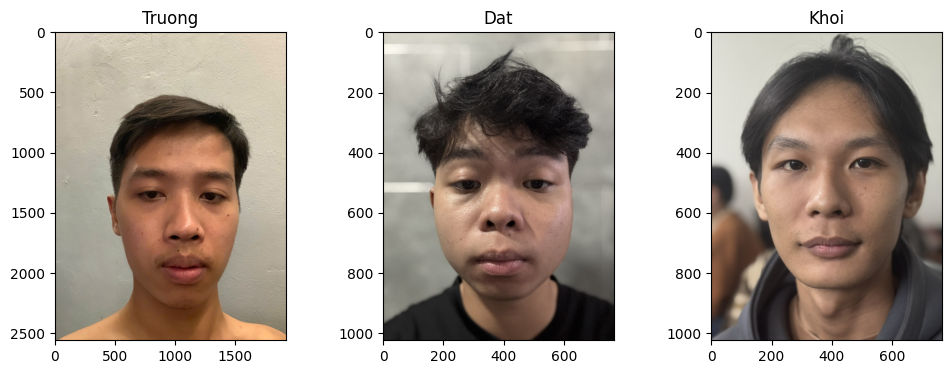

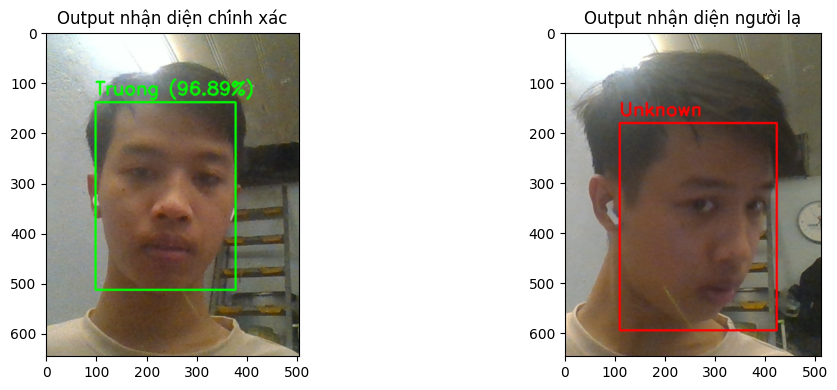

In [9]:
# Hi√™Ãân thiÃ£ m√¥Ã£t vaÃÄi aÃânh
ImageFile.LOAD_TRUNCATED_IMAGES = True

# m√¥ taÃâ aÃânh input
img_truong = Image.open("C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset/Truong/z6620227836982_7b7b53906c53751379c8eb6358baca95.jpg")
img_dat = Image.open("C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset/Dat/Dat1.jpeg")
img_khoi = Image.open("C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset/Duy Khoi/khoi1.jpeg")

# aÃânh output
img_truong_o1= Image.open("C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/code_final/Mota_ouput/mota_output1.png")
img_truong_02= Image.open("C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/code_final/Mota_ouput/mota_output2.png")

# Hi√™Ãân thiÃ£ aÃânh input
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_truong)
plt.title("Truong")
plt.subplot(1, 3, 2)
plt.imshow(img_dat)
plt.title("Dat")
plt.subplot(1, 3, 3)
plt.imshow(img_khoi)
plt.title("Khoi")

# Hi√™Ãân thiÃ£ aÃânh output
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_truong_o1)
plt.title("Output nh√¢Ã£n di√™Ã£n chiÃÅnh xaÃÅc")
plt.subplot(1, 2, 2)
plt.imshow(img_truong_02)
plt.title("Output nh√¢Ã£n di√™Ã£n ng∆∞∆°ÃÄi laÃ£")

plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------


STEP 2: Data Understanding.

M·ª•c ƒë√≠ch: Hi·ªÉu r√µ ch·∫•t l∆∞·ª£ng ƒë·∫∑c ƒëi·ªÉm vaÃÄ ti√™ÃÄn x∆∞Ãâ lyÃÅ d∆∞ÃÉ li√™Ã£u aÃânh

Bao g√¥ÃÄm 
- Inconsistent: T√¨m d·ªØ li·ªáu kh√¥ng nh·∫•t qu√°n
- Data Overview: Ki·ªÉm tra t√¥Ãâng quan d·ªØ li·ªáu( s√¥ÃÅ l∆∞∆°Ã£ng aÃânh vaÃÄ kiÃÅch th∆∞∆°ÃÅc ph√¥Ãâ bi√™ÃÅn)
- Imbalanced: Ki·ªÉm tra s·ª± m·∫•t c√¢n b·∫±ng gi·ªØa c√°c l·ªõp
- Data Augmentation : TƒÉng c∆∞∆°ÃÄng d∆∞ÃÉ li√™Ã£u 


In [11]:
# ki√™Ãâm tra file naÃÄo ko phaÃâi aÃânh hoƒÉÃ£c biÃ£ l√¥ÃÉi thiÃÄ xoÃÅa

# duy√™Ã£t t∆∞ÃÄng t√™Ã£p trong t∆∞ÃÄng th∆∞ muÃ£c con cuÃâa dataset
for person in os.listdir(dataset_path): 
    person_path = os.path.join(dataset_path, person)
    for img_file in os.listdir(person_path):
        img_path = os.path.join(person_path, img_file)
        # Th∆∞Ã£c hi√™Ã£n xaÃÅc minh n√™ÃÅu ko phaÃâi laÃÄ ƒëiÃ£nh daÃ£ng cuÃâa aÃânh thiÃÄ th∆∞Ã£c hi√™Ã£n xoÃÅa 
        try:
            with Image.open(img_path) as img:
                img.verify()  # haÃÄm xaÃÅc minh aÃânh
        except (UnidentifiedImageError, OSError):
            print(f"·∫¢nh l·ªói: {img_path} \n -- ƒêang x√≥a...")
            os.remove(img_path)  # X√≥a file  l·ªói

·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\An\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Anh\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Duc\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Duong\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Duy Khoi\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Ha\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Hieu\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Lam\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Long\.DS_Store 
 -- ƒêang x√≥a...
·∫¢nh l·ªói: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset\Luan\.DS_Store 
 -- ƒêang x√≥a...
·∫

In [12]:
# ki√™Ãâm tra s√¥ÃÅ l∆∞∆°Ã£ng aÃânh vaÃÄ kiÃÅch th∆∞∆°ÃÅc ph√¥Ãâ bi√™ÃÅn
sizes = []
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    for img_file in os.listdir(person_path):
        img_path = os.path.join(person_path, img_file)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
        except:
            pass  # B·ªè qua ·∫£nh l·ªói ƒë√£ ph√°t hi·ªán ·ªü tr√™n

print("S·ªë l∆∞·ª£ng ·∫£nh:", len(sizes))
print("K√≠ch th∆∞·ªõc ph·ªï bi·∫øn nh·∫•t:", max(set(sizes), key=sizes.count))

S·ªë l∆∞·ª£ng ·∫£nh: 783
K√≠ch th∆∞·ªõc ph·ªï bi·∫øn nh·∫•t: (640, 480)


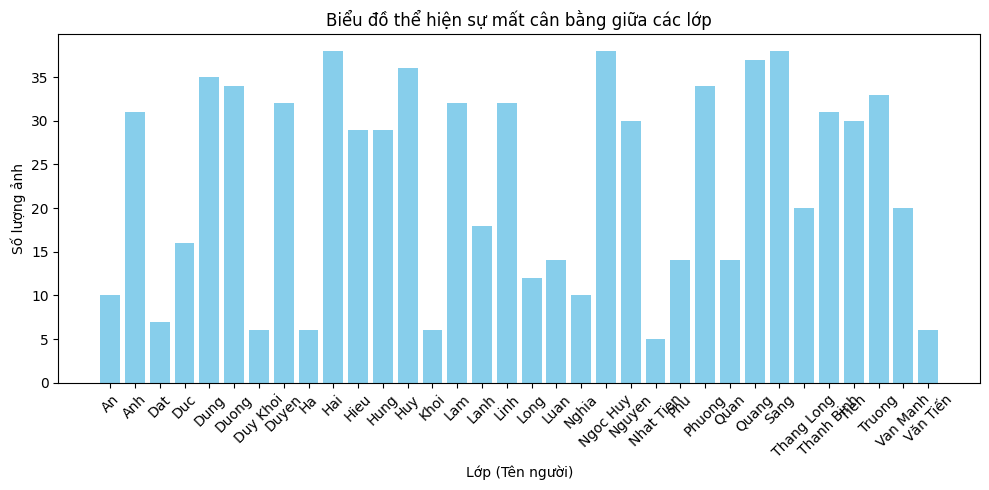

In [13]:
# Ki·ªÉm tra s·ª± m·∫•t c√¢n b·∫±ng gi·ªØa c√°c l·ªõp

class_counts = defaultdict(int)

# ƒê·∫øm s·ªë l∆∞·ª£ng ·∫£nh c·ªßa m·ªói l·ªõp
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):
        for img_file in os.listdir(person_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                class_counts[person] += 1

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
labels = list(class_counts.keys())
values = list(class_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.xlabel("L·ªõp (T√™n ng∆∞·ªùi)")
plt.ylabel("S·ªë l∆∞·ª£ng ·∫£nh")
plt.title("Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ª± m·∫•t c√¢n b·∫±ng gi·ªØa c√°c l·ªõp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
# TƒÉng c∆∞∆°ÃÄng d∆∞ÃÉ li√™Ã£u
# n√™ÃÅu ng∆∞∆°ÃÄi naÃÄo coÃÅ s√¥ÃÅ l∆∞∆°Ã£ng aÃânh d∆∞∆°ÃÅi 30 thiÃÄ tƒÉng c∆∞∆°ÃÄng bƒÉÃÄng caÃÅc pp tcdl

min_images = 30  # S·ªë ·∫£nh t·ªëi thi·ªÉu cho m·ªói l·ªõp

def augment_image(img): # C√°c ph∆∞∆°ng ph√°p tƒÉng c∆∞·ªùng d·ªØ li·ªáu
    operations = [
        lambda x: x.rotate(15), # xoay phaÃâi 1 goÃÅc 15 ƒë√¥Ã£
        lambda x: x.rotate(-15),# xoay traÃÅi 1 goÃÅc 15 ƒë√¥Ã£
        lambda x: x.rotate(10), # xoay phaÃâi 10 ƒë√¥Ã£
        lambda x: x.rotate(-10),# xoay traÃÅi 10 ƒë√¥Ã£
        lambda x: ImageOps.mirror(x), # l√¢Ã£t ngang
        lambda x: ImageEnhance.Brightness(x).enhance(1.5), # tƒÉng ƒë√¥Ã£ saÃÅng
        lambda x: ImageEnhance.Color(x).enhance(1.5), # tƒÉng ƒë√¥Ã£ baÃÉo hoÃÄa
    ]
    op = random.choice(operations)
    return op(img)

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if not os.path.isdir(person_path):
        continue

    # ƒê·∫øm s·ªë ·∫£nh hi·ªán c√≥
    imgs = [f for f in os.listdir(person_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    count = len(imgs)
    print(f"{person} hi·ªán c√≥ {count} ·∫£nh.")
    if count >= min_images:
        continue  # Kh√¥ng c·∫ßn tƒÉng c∆∞·ªùng
    # T·∫°o th√™m ·∫£nh ƒë·ªÉ ƒë·ªß min_images
    needed = min_images - count
    print(f"TƒÉng c∆∞·ªùng th√™m {needed} ·∫£nh cho l·ªõp {person}.")

    for i in range(needed):
        # Ch·ªçn ng·∫´u nhi√™n 1 ·∫£nh g·ªëc ƒë·ªÉ bi·∫øn ƒë·ªïi
        orig_img_name = random.choice(imgs)
        orig_img_path = os.path.join(person_path, orig_img_name)
        with Image.open(orig_img_path) as img:
            aug_img = augment_image(img)
            # L∆∞u ·∫£nh m·ªõi v·ªõi t√™n m·ªõi
            new_img_name = f"aug_{i}_{orig_img_name}"
            new_img_path = os.path.join(person_path, new_img_name)
            aug_img.save(new_img_path)

print("TƒÉng c∆∞·ªùng d·ªØ li·ªáu ho√†n t·∫•t.")


An hi·ªán c√≥ 10 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 20 ·∫£nh cho l·ªõp An.


Anh hi·ªán c√≥ 31 ·∫£nh.
Dat hi·ªán c√≥ 7 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 23 ·∫£nh cho l·ªõp Dat.
Duc hi·ªán c√≥ 16 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 14 ·∫£nh cho l·ªõp Duc.
Dung hi·ªán c√≥ 35 ·∫£nh.
Duong hi·ªán c√≥ 34 ·∫£nh.
Duy Khoi hi·ªán c√≥ 6 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 24 ·∫£nh cho l·ªõp Duy Khoi.
Duyen hi·ªán c√≥ 32 ·∫£nh.
Ha hi·ªán c√≥ 6 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 24 ·∫£nh cho l·ªõp Ha.
Hai hi·ªán c√≥ 38 ·∫£nh.
Hieu hi·ªán c√≥ 29 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 1 ·∫£nh cho l·ªõp Hieu.
Hung hi·ªán c√≥ 29 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 1 ·∫£nh cho l·ªõp Hung.
Huy hi·ªán c√≥ 36 ·∫£nh.
Khoi hi·ªán c√≥ 6 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 24 ·∫£nh cho l·ªõp Khoi.
Lam hi·ªán c√≥ 32 ·∫£nh.
Lanh hi·ªán c√≥ 18 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 12 ·∫£nh cho l·ªõp Lanh.
Linh hi·ªán c√≥ 32 ·∫£nh.
Long hi·ªán c√≥ 12 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 18 ·∫£nh cho l·ªõp Long.
Luan hi·ªán c√≥ 14 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 16 ·∫£nh cho l·ªõp Luan.
Nghia hi·ªán c√≥ 10 ·∫£nh.
TƒÉng c∆∞·ªùng th√™m 20 ·∫£nh cho l·ªõp Nghia.
Ngoc H

In [10]:
# kh√¥i phuÃ£c laÃ£i
import os

for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if not os.path.isdir(person_path):
        continue

    for img_file in os.listdir(person_path):
        if img_file.startswith("aug_"):
            img_path = os.path.join(person_path, img_file)
            os.remove(img_path)

print("ƒê√£ kh√¥i ph·ª•c l·∫°i d·ªØ li·ªáu ban ƒë·∫ßu (ƒë√£ x√≥a c√°c ·∫£nh tƒÉng c∆∞·ªùng).")

ƒê√£ kh√¥i ph·ª•c l·∫°i d·ªØ li·ªáu ban ƒë·∫ßu (ƒë√£ x√≥a c√°c ·∫£nh tƒÉng c∆∞·ªùng).


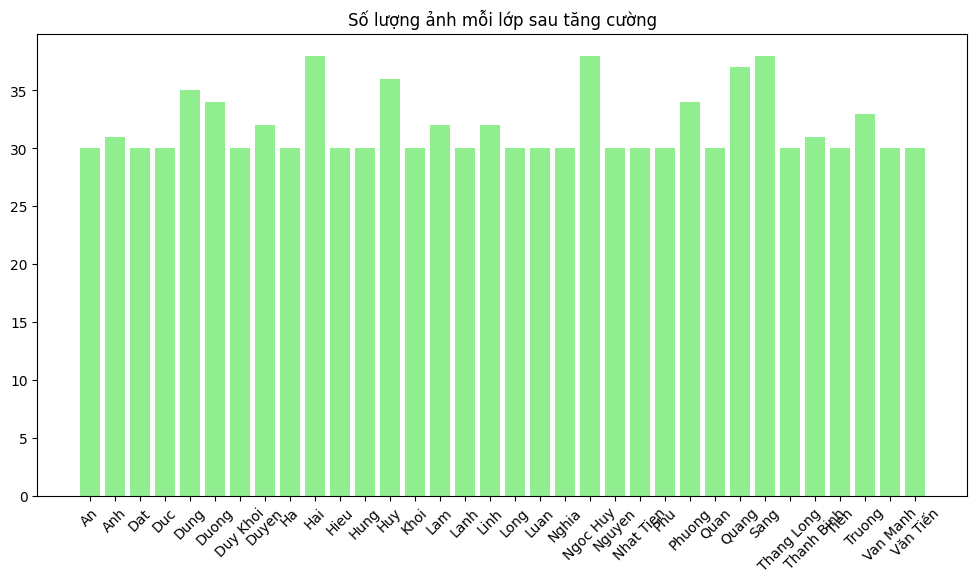

In [180]:
# Ki√™Ãâm tra laÃ£i s∆∞Ã£ m√¢ÃÅt c√¢n bƒÉÃÄng cuÃâa caÃÅc l∆°ÃÅp
class_counts = defaultdict(int)
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):
        class_counts[person] = len([f for f in os.listdir(person_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.title("S·ªë l∆∞·ª£ng ·∫£nh m·ªói l·ªõp sau tƒÉng c∆∞·ªùng")
plt.show()

--------------------------------------------------------------------------------------------------------------------------

Step 3. Feature Understanding

M·ª•c ƒë√≠ch: Th∆∞Ã£c hi√™Ã£n triÃÅch xu√¢ÃÅt ƒëƒÉÃ£c tr∆∞ng vaÃÄ Kh√°m ph√° m·ªëi quan h·ªá gi·ªØa c√°c bi·∫øn

Th∆∞Ã£c hi√™Ã£n triÃÅch xu√¢ÃÅt ƒëƒÉÃ£c tr∆∞ng


Multivariate: Ph√¢n t√≠ch m·ªëi quan h·ªá ƒëa bi·∫øn (UMAP)



In [15]:
# TriÃÅch xu√¢ÃÅt ƒëƒÉÃ£c tr∆∞ng bƒÉÃÄng FaceNet v∆°ÃÅi dataset ƒëaÃÉ x∆∞Ãâ lyÃÅ

# caÃÄi ƒëƒÉÃ£t thi·∫øt b·ªã: ∆∞u ti√™n s∆∞Ãâ duÃ£ng gpu n√™ÃÅu ko thiÃÄ sd cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Kh·ªüi t·∫°o MTCNN v√† FaceNet

# mtcnn: m√¥ hiÃÄnh phaÃÅt hi√™Ã£n khu√¥n mƒÉÃ£t 
mtcnn = MTCNN(image_size=160, margin=20, device=device)
# facenet m√¥ hiÃÄnh nh√¢Ã£n daÃ£ng khu√¥n mƒÉÃ£t ( d∆∞∆°ÃÅi daÃ£ng ƒëƒÉÃ£c tr∆∞ng v∆°ÃÅi vector 512 chi√™ÃÄu)
facenet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# ƒê∆∞·ªùng d·∫´n d·ªØ li·ªáu v√† n∆°i l∆∞u ƒë·∫∑c tr∆∞ng
data_root = "C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/dataset"
save_root = "C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings"
os.makedirs(save_root, exist_ok=True)

# Duy·ªát t·ª´ng th∆∞ m·ª•c ng∆∞·ªùi
for person_name in os.listdir(data_root):
    person_folder = os.path.join(data_root, person_name)
    if not os.path.isdir(person_folder) or person_name.startswith('.'):
        continue

# l∆∞u ƒëƒÉÃ£c tr∆∞ng vaÃÄ nhaÃÉn
    embeddings = []
    labels = []
# duy√™Ã£t t∆∞ÃÄng aÃânh vaÃÄ chuy√™Ãân hoÃÅa 
    print(f"ƒêang x·ª≠ l√Ω: {person_name}")
    for filename in os.listdir(person_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(person_folder, filename)
            try:
                img = Image.open(img_path)
                if img.mode != 'RGB':
                    img = img.convert("RGB")

                # TriÃÅch xu√¢ÃÅt ƒëƒÉÃ£c tr∆∞ng
                # PhaÃÅt hi√™Ã£n khu√¥n mƒÉÃ£t
                face = mtcnn(img)
                
                if face is not None:                        # n√™ÃÅu phaÃÅt hi√™Ã£n dc khu√¥n mƒÉÃ£t
                    face = face.unsqueeze(0).to(device)     # ƒë∆∞a vaÃÄo facenet th∆∞Ã£c hi√™Ã£n th√™m patch, r ƒë∆∞a tenso len gpu
                    with torch.no_grad():                   # ko c√¢ÃÄn hu√¢ÃÅn luy√™Ã£n, chiÃâ c√¢ÃÄn triÃÅch xu√¢ÃÅt n√™n v√¥ hi√™Ã£u hoÃÅa gradient
                        emb = facenet(face).cpu().numpy()   # l√¢ÃÅy embedding, chuy√™Ãân v√™ÃÄ cpu v∆°ÃÅi daÃ£ng maÃâng numpy
                    embeddings.append(emb[0])               # th√™m vecto kiÃÅch th∆∞∆°ÃÅc vaÃÄo ƒëƒÉÃ£c tr∆∞ng
                    labels.append(person_name)              # gaÃÅn nhaÃÉn
                else:
                    print(f" Kh√¥ng nh·∫≠n di·ªán ƒë∆∞·ª£c khu√¥n m·∫∑t: {filename} ({person_name})")

            except Exception as e:
                print(f" L·ªói khi m·ªü ·∫£nh {filename}: {e}")

    if embeddings:
        save_path = os.path.join(save_root, f"{person_name}.npz")
        np.savez(save_path, features=np.array(embeddings), labels=np.array(labels))
        print(f" ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa {person_name} v√†o {save_path}")
    else:
        print(f" Kh√¥ng c√≥ ƒë·∫∑c tr∆∞ng n√†o ƒë∆∞·ª£c tr√≠ch t·ª´ {person_name}")

ƒêang x·ª≠ l√Ω: An
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa An v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\An.npz
ƒêang x·ª≠ l√Ω: Anh
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Anh v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Anh.npz
ƒêang x·ª≠ l√Ω: Dat
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Dat v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Dat.npz
ƒêang x·ª≠ l√Ω: Duc
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Duc v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Duc.npz
ƒêang x·ª≠ l√Ω: Dung
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Dung v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Dung.npz
ƒêang x·ª≠ l√Ω: Duong
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Duong v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Duong.npz
ƒêang x·ª≠ l√Ω: Duy Khoi
 ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng c·ªßa Duy Khoi v√†o C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/saved_embeddings\Duy Khoi.npz
ƒêang x·ª≠ l√Ω: Duyen
 ƒê√£ l∆∞u ƒ

------------------------------------------------------------------------------------------------------------------------

STEP 4: Feature Engineering ( K·ªπ thu·∫≠t ƒë·∫∑c tr∆∞ng )
Chu·∫©n b·ªã v√† bi·∫øn ƒë·ªïi d·ªØ li·ªáu ƒë·∫ßu v√†o th√†nh d·∫°ng t·ªët nh·∫•t cho m√¥ h√¨nh h·ªçc m√°y.

Bao g√¥ÃÄm caÃÅc b∆∞∆°ÃÅc:

+ [KH√îNG C√ÇÃÄN THI√äÃÅT] 
-  Missing Values vaÃÄ Outlier Handling : t∆∞ÃÄ b∆∞∆°ÃÅc ƒë√¢ÃÄu ƒëaÃÉ x∆∞Ãâ lyÃÅ vaÃÄ loaÃ£i boÃâ caÃÅc t√™Ã£p ko phaÃâi aÃânh r√¥ÃÄi, m√¥ÃÉi aÃânh seÃÉ chiÃâ triÃÅch xu√¢ÃÅt ra 1 vecto ƒëƒÉÃ£c tr∆∞ng n√™n ƒëaÃÉ ƒë∆∞∆°Ã£c chu√¢Ãân hoÃÅa vaÃÄ nh√¢ÃÅt quaÃÅn.
-  Inconsistent ( GiaÃÅ triÃ£ kh√¥ng nh√¢ÃÅt quaÃÅn) : embedding laÃÄ ƒë√¢ÃÄu ra ƒëaÃÉ ƒë∆∞∆°Ã£c ƒëaÃâm baÃâo tiÃÅnh nh√¢ÃÅt quaÃÅn (1:1); dl aÃânh ko nh∆∞ d∆∞ÃÉ li√™Ã£u text hay tabular, hai daÃ£ng naÃÄy hay gƒÉÃ£p l√¥ÃÉi kh√¥ng nh√¢ÃÅt quaÃÅn nh∆∞: (Nam/Nam gi·ªõi/Male)

-  Skewness: (ƒê·ªô l·ªách ph√¢n ph·ªëi)  V√¨ embedding kh√¥ng ph·∫£i l√† d·ªØ li·ªáu d·∫°ng tabular ( tu√¥Ãâi taÃÅc...)
ph√¢n ph√¥ÃÅi coÃÅ th√™Ãâ ko theo chu√¢Ãân viÃÄ ƒëaÃÉ hoÃ£c dc ko gian bi√™Ãâu di√™ÃÉn t√¥ÃÅi ∆∞u ( th√¢Ã£m chiÃÅ eÃÅp log, sqrt coÃÅ th√™Ãâ phaÃÅ hoÃâng ƒëƒÉÃ£c tr∆∞ng ƒëaÃÉ hoÃ£c)


- Feature Selection (PCA) qu√° tr√¨nh ch·ªçn ra nh·ªØng ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t, lo·∫°i b·ªè c√°c chi·ªÅu d∆∞ th·ª´a ho·∫∑c √≠t th√¥ng tin, nh∆∞ng viÃÄ dataset coÃÅ iÃÅt d∆∞ÃÉ li√™Ã£u n√™n n√™ÃÅu giaÃâm chi√™ÃÄu c√≥ th·ªÉ l√†m m·∫•t c√°c ƒë·∫∑c tr∆∞ng quan tr·ªçng seÃÉ biÃ£ aÃânh h∆∞∆°Ãâng ƒë√™ÃÅn ƒë√¥Ã£ chiÃÅnh xaÃÅc vaÃÄ k√™ÃÅt quaÃâ nh√¢Ã£n daÃ£ng.


- Feature Transformation: l√† qu√° tr√¨nh bi·∫øn ƒë·ªïi ƒë·∫∑c tr∆∞ng theo c√°c h√†m to√°n h·ªçc ƒë·ªÉ d·ªÖ m√¥ h√¨nh h√≥a h∆°n, tƒÉng kh·∫£ nƒÉng ph√¢n bi·ªát gi·ªØa c√°c l·ªõp. 

Nh∆∞ng Embedding c·ªßa FaceNet ƒë√£ ƒë∆∞·ª£c h·ªçc phi tuy·∫øn v√† t·ªëi ∆∞u, c√≥ L2-normalized s·∫µn......C√°c ph√©p bi·∫øn ƒë·ªïi nh∆∞ log/sqrt/polynomial s·∫Ω l√†m m√©o kh√¥ng gian ƒë·∫∑c tr∆∞ng, g√¢y sai l·ªách 



+ [ C√ÇÃÄN THI√äÃÅT]

- Label Encoding: Bi·∫øn ƒë·ªïi nh√£n d·∫°ng text (chu·ªói) nh∆∞ t√™n ng∆∞·ªùi ‚Üí th√†nh d·∫°ng s·ªë nguy√™n ƒë·ªÉ m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c d√™ÃÉ daÃÄng h∆°n.

- One-hot Encoding: laÃÄ 1 caÃÅch bi√™Ãâu di√™ÃÉn nhaÃÉn d∆∞∆°ÃÅi daÃ£ng vecto nhiÃ£ ph√¢n [0,1]

- Feature Scaling: Normalization (Chu·∫©n h√≥a)  L2-normalized l√† qu√° tr√¨nh bi·∫øn ƒë·ªïi c√°c ƒë·∫∑c tr∆∞ng sao cho ch√∫ng n·∫±m trong m·ªôt kho·∫£ng gi√° tr·ªã chu·∫©n , gi√∫p m√¥ h√¨nh h·ªçc m√°y x·ª≠ l√Ω t·ªët h∆°n.




In [5]:
# Th√™m label encoding 
all_labels = []
save_label= "C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/code_final" 
# Duy·ªát qua c√°c file npz ƒë·ªÉ gom nh√£n
for file in os.listdir(embedding_dir):
    if file.endswith(".npz"):
        data = np.load(os.path.join(embedding_dir, file))
        labels = data['labels']
        all_labels.extend(labels.tolist())

# Label Encoding
le = LabelEncoder()
encoded_labels = le.fit_transform(all_labels)

print(f"T·ªïng s·ªë nh√£n: {len(all_labels)}")
print(f"S·ªë l·ªõp (s·ªë ng∆∞·ªùi): {len(le.classes_)}")
print(f"V√≠ d·ª• m√£ h√≥a: {list(zip(all_labels[:5], encoded_labels[:5]))}")

# L∆∞u LabelEncoder ƒë·ªÉ s·ª≠ d·ª•ng l·∫°i v·ªÅ sau
with open(os.path.join(save_label, "label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)

print("ƒê√£ l∆∞u LabelEncoder v√†o file label_encoder.pkl")


T·ªïng s·ªë nh√£n: 1118
S·ªë l·ªõp (s·ªë ng∆∞·ªùi): 36
V√≠ d·ª• m√£ h√≥a: [('An', 0), ('An', 0), ('An', 0), ('An', 0), ('An', 0)]
ƒê√£ l∆∞u LabelEncoder v√†o file label_encoder.pkl


Feature Scaling: Normalization (Chu·∫©n h√≥a)

In [7]:
# ki√™Ãâm tra xem L2 - nomalize coÃÅ ch∆∞a
norms = np.linalg.norm(all_embeddings, axis=1)
print("L2-normalize : ", np.mean(norms))  # K·∫øt qu·∫£ ƒë√£ chu√¢Ãân hoÃÅa


L2-normalize :  1.0


-------------------------------------------------------------------------------------------------------------------------

STEP 5 : Dataset Partition
M·ª•c ƒë√≠ch: Chia d·ªØ li·ªáu ƒë·ªÉ hu·∫•n luy·ªán v√† ƒë√°nh gi√°

Imbalanced Handling: X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu (SMOTE, undersampling) : khoog c√¢ÃÄn thi√™ÃÅt b∆°Ãâi viÃÄ ∆°Ãâ b∆∞∆°ÃÅc ti√™ÃÄn x∆∞Ãâ lyÃÅ aÃânh, d∆∞ÃÉ li√™Ã£u ƒëaÃÉ ƒë∆∞∆°Ã£c c√¢n bƒÉÃÄng khaÃÅ t√¥ÃÅt r, ko coÃÅ s∆∞Ã£ ch√™nh l√™Ã£ch quaÃÅ nhi√™ÃÄu.

Train Test Split: Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra


In [8]:
# CHIA TAÃ£P D∆ØÃÉ LI√äÃ£U
# Danh s√°ch ƒë·∫∑c tr∆∞ng train v√† test
train_embeddings, train_labels = [], []
test_embeddings, test_labels = [], []

# Duy·ªát qua c√°c file .npz
for file in os.listdir(embedding_dir):
    if file.endswith(".npz"):
        path = os.path.join(embedding_dir, file)
        data = np.load(path)
        features = data["features"]
        labels = data["labels"]
        n = len(features)

        # Shuffle ng·∫´u nhi√™n
        idx = list(range(n))
        random.shuffle(idx)

        # T√≠nh s·ªë l∆∞·ª£ng test = 30%
        num_test = max(1, int(n * 0.30))
        test_idx = idx[:num_test]
        train_idx = idx[num_test:]

        # T√°ch vecto ƒëƒÉÃ£c tr∆∞ng ( ƒë√™Ãâ ƒë∆∞a vaÃÄo train vaÃÄ test)
        test_embeddings.append(features[test_idx])
        test_labels.append(labels[test_idx])
        train_embeddings.append(features[train_idx])
        train_labels.append(labels[train_idx])

# G·ªôp ƒëƒÉÃ£c tr∆∞ng vaÃÄ nhaÃÉn laÃ£i
X_train = np.vstack(train_embeddings)
y_train = np.concatenate(train_labels)
X_test = np.vstack(test_embeddings)
y_test = np.concatenate(test_labels)

# L∆∞u k·∫øt qu·∫£
save_dir = "C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/code_final/data_split"  
os.makedirs(save_dir, exist_ok=True)

np.savez(os.path.join(save_dir, "train_embeddings.npz"), features=X_train, labels=y_train)
np.savez(os.path.join(save_dir, "test_embeddings.npz"), features=X_test, labels=y_test)

print(f" ƒê√£ chia d·ªØ li·ªáu")
print(f"Train samples: {len(X_train)}")
print(f"Test samples : {len(X_test)}")
print(f"ƒê√£ l∆∞u t·∫°i: {save_dir}")


 ƒê√£ chia d·ªØ li·ªáu
Train samples: 791
Test samples : 327
ƒê√£ l∆∞u t·∫°i: C:/Users/Loc/Desktop/Do_An_Co_So/Do_An_Co_So/code/code_final/data_split


--------------------------------------------------------------------------------------------------------------------------

Step 6. Data Modelling

M·ª•c ƒë√≠ch: Th·ª≠ nghi·ªám c√°c thu·∫≠t to√°n ML kh√°c nhau

Machine Learning methods:  (Random Forest, SVM, LogisticRegression)

Deep Learning methods:  (MobileNetv2, ResNet, FaceNet, CNN )

So s√°nh hi·ªáu su·∫•t c·ªßa c√°c models